Dataset Overview:
   Student_ID  Age  Gender  Study_Hours  Previous_Score Learning_Style  \
0           1   16    Male     1.465135              66    Kinesthetic   
1           2   13  Female     5.782192              58    Kinesthetic   
2           3   14    Male     5.865716              82       Auditory   
3           4   16  Female     6.736869              69    Kinesthetic   
4           5   12   Other     7.534822              62    Kinesthetic   

   Engagement_Level  Parental_Involvement Learning_Resources  \
0          4.258299              4.339721             Medium   
1          3.660789              4.937609               High   
2          3.092262              3.102761               High   
3          2.435322              1.686717             Medium   
4          4.508802              2.089229               High   

   Attendance_Percentage  Self_Motivation  Final_Score  
0              88.768071         3.441335    88.635148  
1              69.138190         3.864

/Users/pranitha/Documents/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


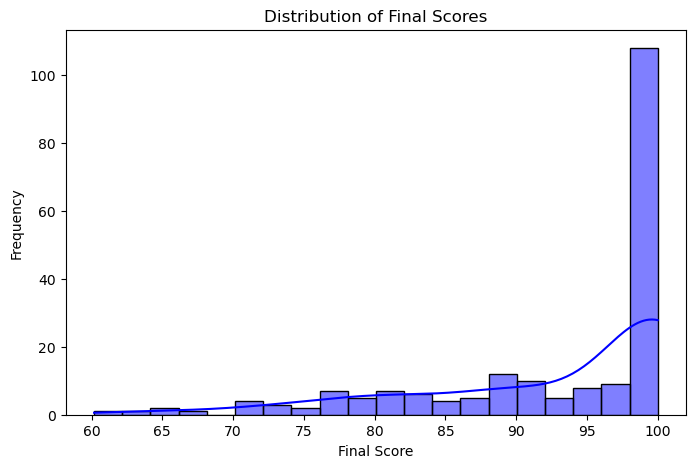

<Figure size 1000x600 with 0 Axes>

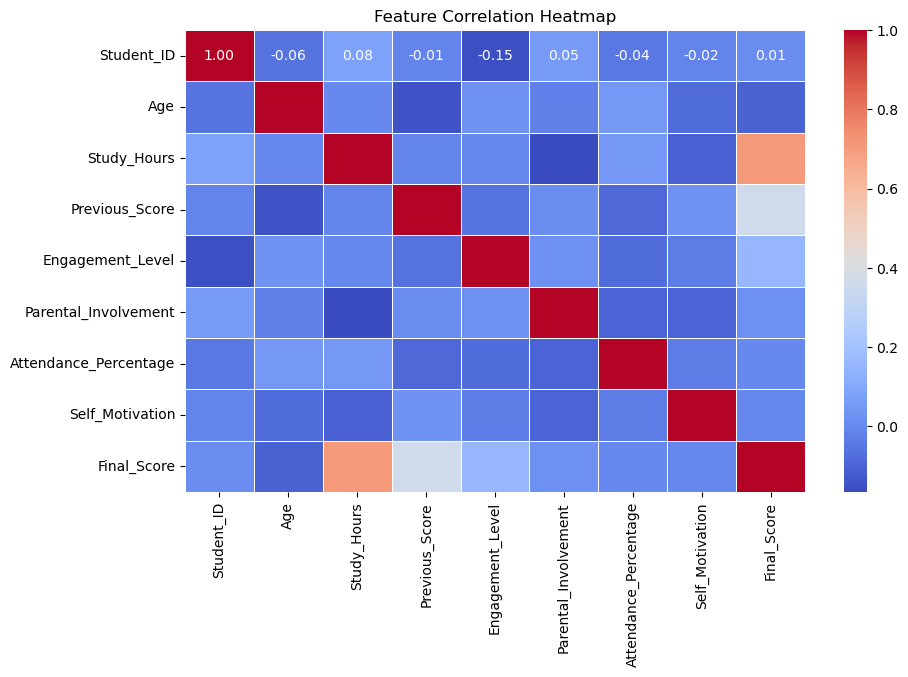

Random Forest - Best Params: {'max_depth': None, 'n_estimators': 300}, MAE: 3.99, R²: 0.76
Gradient Boosting - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}, MAE: 4.24, R²: 0.72


/Users/pranitha/Documents/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pranitha/Documents/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pranitha/Documents/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/pranitha/Documents/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
 

Neural Network - Best Params: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01}, MAE: 16.80, R²: -2.74

Model Performance Comparison:
                         MAE        R²
Random Forest       3.992386  0.757089
Gradient Boosting   4.243370  0.722120
Neural Network     16.799252 -2.744153


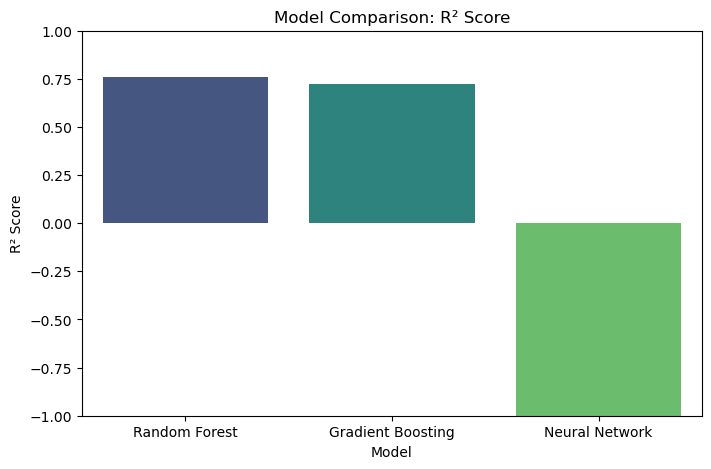


Best Model: Random Forest
The preferred model is selected based on the highest R² score, indicating the best explanatory power for predicting final scores.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
dataset_path = "personalized_learning_dataset_v2.csv"
df = pd.read_csv(dataset_path)

# Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace=True)

# Visualize the distribution of Final_Score
plt.figure(figsize=(8, 5))
sns.histplot(df['Final_Score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))

# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_features = ['Gender', 'Learning_Resources', 'Learning_Style']
categorical_encoded = encoder.fit_transform(df[categorical_features])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Study_Hours', 'Previous_Score', 'Engagement_Level', 'Parental_Involvement', 'Attendance_Percentage', 'Self_Motivation']
numerical_scaled = scaler.fit_transform(df[numerical_features])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_features)

# Combine processed features
X = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)
y = df['Final_Score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')

param_grid_gb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='r2')

param_grid_nn = {'hidden_layer_sizes': [(100,), (100, 50)], 'learning_rate_init': [0.001, 0.01]}
nn = GridSearchCV(MLPRegressor(max_iter=500, random_state=42), param_grid_nn, cv=3, scoring='r2')

models = {"Random Forest": rf, "Gradient Boosting": gb, "Neural Network": nn}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    best_model = model.best_estimator_
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_results[name] = (mae, r2)
    print(f"{name} - Best Params: {model.best_params_}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Compare Model Performance
results_df = pd.DataFrame(model_results, index=['MAE', 'R²']).T
print("\nModel Performance Comparison:")
print(results_df)

# Plot model performance
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x=results_df.index, y='R²', palette='viridis')
plt.title("Model Comparison: R² Score")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim([-1, 1])
plt.show()

# Conclusion
best_model = max(model_results, key=lambda k: model_results[k][1])
print(f"\nBest Model: {best_model}")
print("The preferred model is selected based on the highest R² score, indicating the best explanatory power for predicting final scores.")
